<a href="https://colab.research.google.com/github/angelmetanosaa/Damin_K-Means-Clustering-Algorithm/blob/master/Tugas_Besar_Machine_Learning_Klasifikasi_Angel_Metanosa_Afinda_1301174639.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PENGENALAN DATASET**
Diberikan sebuah dataset dengan nama air_bnb.csv. Airbnb adalah seperangkat alat dan data independen dan non-komersial yang memungkinkan Anda menjelajahi bagaimana Airbnb benar-benar digunakan di kota-kota di seluruh dunia. Dengan menganalisis informasi yang tersedia untuk umum tentang daftar kota Airbnb, Di dalam Airbnb menyediakan filter dan metrik utama sehingga Anda dapat melihat bagaimana Airbnb digunakan untuk bersaing dengan pasar perumahan perumahan. Airbnb dataset memberikan beberapa fitur yang digunakan untuk memprediksi hal-hal yang berpengaruh dalam penjualan rumah.

# **KLASIFIKASI 1**
---
Klasifikasi merupakan teknik dalam data mining untuk mengelompokkan data berdasarkan keterikatan data terhadap  data sampel. Pada tugas besar ini, saya melakukan perbandingan 2 teknik klasifikasi untuk mengklasifikasi penjualan perumahan pada perusahaan airbnb. 

Pada klasifikasi 1 dan klasifikasi 2, saya menggunakan metode Naive Bayes. Perbedaannya terdapat pada tahapan Prepocessing Datanya. 

---
Untuk klasifikasi 1, saya melakukan drop terhadap seluruh data yang terdapat missing valuenya. Selanjutnya, saya tidak menghapus outlier yang ada pada dataset, namun saya memberikan range pada setiap atribut yang jenis value dalam kolomnya lebih dari 15. Tujuannya, agar data tersebar dalam ukuran range yang sama. Pemberian range ini disesuaikan dengan jumlah data setiap kolomnya dan membagi semuanya sama banyak. Selanjutnya, range-range tersebut akan direplace dengan bilangan integer yang mana hasilnya akan digunakan untuk perhitungan klasifikasi menggunakan metode Naive Bayes.

---



## **Load Data**
Load Data adalah proses upload dan pembacaan data yang telah diupload.

In [ ]:
#import library upload file pada google colab
from google.colab import files
#mengupload file
dataupload = files.upload()

Saving air_bnb.csv to air_bnb (2).csv


In [ ]:
#import io untuk membaca dataset yang telah diupload
import io
#membaca data csv yang telah diupload dengan nama air_bnb
import pandas as pd
df = pd.read_csv(io.BytesIO(dataupload['air_bnb.csv']))
#menampilkan data yang telah dibaca
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


## **Import Library**

In [ ]:
#import library yang menunjang proses mining data
#Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. 
#Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif.
import pandas as pd
#NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 
#NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.
import numpy as np
import collections
#library untuk melakukan bilangan random integer
from random import randint
import random

#Skrip python untuk pembuatan klasifikasi menggunakan metode Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import library untuk split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

# Skrip python untuk pembuatan matriks
#library untuk menampilkan confusion_matrix
from sklearn.metrics import confusion_matrix
#library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score
#library untuk menampilkan classification_report
from sklearn.metrics import classification_report
#library untuk menampilkan f1 score
from sklearn.metrics import f1_score

#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics

##**Prepocessing Data**

In [ ]:
#mengitung jumlah missing value pada data untuk semua kolom yang ada
df.isnull().sum() 

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
#menghapus data yang missing
df.dropna(inplace=True)
#menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18587 entries, 0 to 22536
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18587 non-null  int64  
 1   name                            18587 non-null  object 
 2   host_id                         18587 non-null  int64  
 3   host_name                       18587 non-null  object 
 4   neighbourhood_group             18587 non-null  object 
 5   neighbourhood                   18587 non-null  object 
 6   latitude                        18587 non-null  float64
 7   longitude                       18587 non-null  float64
 8   room_type                       18587 non-null  object 
 9   price                           18587 non-null  int64  
 10  minimum_nights                  18587 non-null  int64  
 11  number_of_reviews               18587 non-null  int64  
 12  last_review                     

In [ ]:
# #menampilkan data terbaru
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,29772631,Cosy and lovely room near Ostkreuz,20727291,Anna,Lichtenberg,Neu Lichtenberg,52.502952,13.490870,Private room,25,2,1,2018-11-04,1.00,1,32
22463,29784461,House on the water HT10 - Heart of East Berlin,22437698,Sebastian,Treptow - Köpenick,Oberschöneweide,52.457982,13.526945,Entire home/apt,99,1,5,2018-11-06,5.00,2,339
22475,29792124,Welcome to Light Apartment,224133729,Inna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.507884,13.467071,Private room,25,1,1,2018-11-05,1.00,1,8
22508,29817383,Prenzlauerberg,224295751,Salem,Pankow,Prenzlauer Berg Nordwest,52.552250,13.410904,Entire home/apt,70,1,1,2018-11-07,1.00,1,350


In [ ]:
#mengitung jumlah data missing setelah didrop
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#eksport data csv dengan nama air_bnbnew2.csv
df.to_csv('air_bnbnew2.csv')

In [ ]:
#menghapus tabel yg tidak digunakan dan tidak banyak berpengaruh pada hasil seperti data-data pribadi misalnya nama dan id
del df['id']
del df['name']
del df['host_id']
del df['host_name']
del df['latitude']
del df['longitude']
del df['last_review']
del df['reviews_per_month']
del df['availability_365']
del df['neighbourhood']

In [ ]:
#menampilkan data terbaru setelah beberapa tabel didrop
df

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Mitte,Entire home/apt,60,4,118,4
1,Pankow,Private room,17,2,6,1
2,Pankow,Entire home/apt,90,62,143,1
3,Tempelhof - Schöneberg,Private room,26,5,25,1
4,Pankow,Private room,42,2,197,1
...,...,...,...,...,...,...
22449,Lichtenberg,Private room,25,2,1,1
22463,Treptow - Köpenick,Entire home/apt,99,1,5,2
22475,Friedrichshain-Kreuzberg,Private room,25,1,1,1
22508,Pankow,Entire home/apt,70,1,1,1


In [ ]:
#rekap data neighbourhood_group
data1 = df['neighbourhood_group']

#proses rekap data
rekapData1 = {}
#melakukan rekap data dengan mencari jenis value dalam kolom beserta jumlah setiap valuenya 
for row in data1:
    if row in rekapData1:
        rekapData1[row] += 1
    else:
        rekapData1[row] = 1
#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData1)

#mengurutkan value dari nilai besar ke kecil
from operator import itemgetter
 
#sorting data
sortedRekapData1 = sorted(rekapData1.items(), key=itemgetter(1), reverse=True)
 
#print value yang sudah direkap
print(sortedRekapData1)
print(' ')
#print banyaknya data pada tabel neighbourhood_group
print('Banyaknya data pada Tabel neighbourhood_group = ', len(sortedRekapData1))

#melakukan replace terhadap value yang ada pada atribut dengan bilangan integer
df['neighbourhood_group'] =  df['neighbourhood_group'].replace({'Friedrichshain-Kreuzberg': 1, 'Mitte': 2, 'Pankow': 3, 'Neukölln': 4, 'Tempelhof - Schöneberg': 5,'Charlottenburg-Wilm.': 6, 'Lichtenberg': 7, 'Treptow - Köpenick': 8, 'Steglitz - Zehlendorf': 9, 'Reinickendorf': 10, 'Marzahn - Hellersdorf': 11, 'Spandau': 12})

{'Mitte': 3821, 'Pankow': 2949, 'Tempelhof - Schöneberg': 1283, 'Friedrichshain-Kreuzberg': 4589, 'Neukölln': 2900, 'Charlottenburg-Wilm.': 1282, 'Treptow - Köpenick': 477, 'Steglitz - Zehlendorf': 350, 'Reinickendorf': 199, 'Lichtenberg': 529, 'Marzahn - Hellersdorf': 114, 'Spandau': 94}
[('Friedrichshain-Kreuzberg', 4589), ('Mitte', 3821), ('Pankow', 2949), ('Neukölln', 2900), ('Tempelhof - Schöneberg', 1283), ('Charlottenburg-Wilm.', 1282), ('Lichtenberg', 529), ('Treptow - Köpenick', 477), ('Steglitz - Zehlendorf', 350), ('Reinickendorf', 199), ('Marzahn - Hellersdorf', 114), ('Spandau', 94)]
 
Banyaknya data pada Tabel neighbourhood_group =  12


In [ ]:
#rekap data room_type
data3 = df['room_type']

# proses rekap 
rekapData3 = {}
for row in data3:
    if row in rekapData3:
        rekapData3[row] += 1
    else:
        rekapData3[row] = 1

#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData3)

#mengurutkan dari besar ke kecil
from operator import itemgetter
 
# sorting descending
sortedRekapData3 = sorted(rekapData3.items(), key=itemgetter(1), reverse=True)
 
print(sortedRekapData3)
print(' ')
print('Banyaknya data pada Tabel room_type = ', len(sortedRekapData3))

df['room_type'] = df['room_type'].replace({'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3})

{'Entire home/apt': 8835, 'Private room': 9534, 'Shared room': 218}
[('Private room', 9534), ('Entire home/apt', 8835), ('Shared room', 218)]
 
Banyaknya data pada Tabel room_type =  3


In [ ]:
#rekap data calculated_host_listings_count
data4 = df['calculated_host_listings_count']

# proses rekap 
rekapData4 = {}
#melakukan rekap data dengan mencari isi value dalam tabel beserta jumlah setiap valuenya 
for row in data4:
    if row in rekapData4:
        rekapData4[row] += 1
    else:
        rekapData4[row] = 1
#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData4)

#mengurutkan dari besar ke kecil
from operator import itemgetter
 
# sorting descending
sortedRekapData4 = sorted(rekapData4.items(), key=itemgetter(1), reverse=True)

print(sortedRekapData4)
print(' ')
#print total panjang sortedRekapData4
print('Banyaknya data pada Tabel calculated_host_listings_count = ', len(sortedRekapData4))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData4:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])

#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data calculated_host_listings_count, diberikan sejumlah 2 array untuk setiap rangenya
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[:2], 1)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[2:4], 2)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[4:6], 3)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[6:8], 4)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[8:10], 5)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[10:12], 6)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[12:14], 7)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[14:16], 8)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[16:18], 9)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[18:20], 10)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[20:22], 11)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].replace(ambil[22:23], 12)

{4: 291, 1: 14105, 3: 697, 2: 2452, 10: 31, 5: 180, 6: 132, 14: 26, 9: 77, 11: 41, 7: 107, 12: 59, 43: 38, 17: 50, 15: 27, 19: 59, 8: 67, 30: 28, 13: 19, 18: 16, 26: 15, 16: 26, 45: 44}
[(1, 14105), (2, 2452), (3, 697), (4, 291), (5, 180), (6, 132), (7, 107), (9, 77), (8, 67), (12, 59), (19, 59), (17, 50), (45, 44), (11, 41), (43, 38), (10, 31), (30, 28), (15, 27), (14, 26), (16, 26), (13, 19), (18, 16), (26, 15)]
 
Banyaknya data pada Tabel calculated_host_listings_count =  23


In [ ]:
#rekap data price
data5 = df['price']

# proses rekap 
rekapData5 = {}
for row in data5:
    if row in rekapData5:
        rekapData5[row] += 1
    else:
        rekapData5[row] = 1

#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData5)

#mengurutkan dari besar ke kecil
from operator import itemgetter
 
# sorting descending
sortedRekapData5 = sorted(rekapData5.items(), key=itemgetter(1), reverse=True)
 
print(sortedRekapData5)
print(' ')
print('Banyaknya data pada Tabel price = ', len(sortedRekapData5))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData5:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])

#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data calculated_host_listings_count, diberikan sejumlah 30 array untuk setiap rangenya
df['price'] = df['price'].replace(ambil[:30], 1)
df['price'] = df['price'].replace(ambil[30:60], 2)
df['price'] = df['price'].replace(ambil[60:90], 3)
df['price'] = df['price'].replace(ambil[90:120], 4)
df['price'] = df['price'].replace(ambil[120:150], 5)
df['price'] = df['price'].replace(ambil[150:180], 6)
df['price'] = df['price'].replace(ambil[180:210], 7)
df['price'] = df['price'].replace(ambil[210:240], 8)
df['price'] = df['price'].replace(ambil[240:270], 9)
df['price'] = df['price'].replace(ambil[270:274], 10)

{60: 683, 17: 93, 90: 270, 26: 161, 42: 198, 180: 39, 70: 470, 45: 741, 49: 320, 129: 41, 98: 43, 160: 36, 65: 452, 197: 3, 130: 84, 100: 316, 44: 103, 62: 48, 55: 538, 40: 956, 25: 894, 52: 106, 39: 338, 80: 448, 50: 1022, 43: 99, 36: 126, 119: 42, 56: 43, 48: 176, 88: 29, 200: 49, 120: 211, 37: 126, 102: 5, 29: 285, 84: 28, 69: 220, 185: 12, 155: 15, 66: 34, 53: 50, 92: 17, 75: 341, 114: 6, 506: 1, 82: 16, 68: 59, 125: 51, 89: 123, 59: 242, 96: 17, 31: 84, 81: 12, 161: 1, 30: 1136, 23: 165, 35: 1030, 76: 30, 46: 68, 296: 2, 244: 2, 20: 479, 170: 27, 64: 50, 375: 1, 32: 219, 86: 14, 79: 126, 38: 218, 74: 22, 195: 11, 165: 14, 51: 41, 110: 112, 95: 175, 28: 251, 85: 222, 58: 98, 63: 40, 175: 12, 150: 133, 19: 115, 91: 17, 93: 14, 72: 38, 33: 166, 99: 153, 148: 3, 9: 18, 61: 16, 34: 147, 54: 70, 235: 6, 77: 20, 149: 30, 87: 15, 27: 203, 78: 36, 67: 33, 22: 215, 109: 35, 83: 13, 209: 2, 47: 77, 189: 12, 15: 122, 73: 21, 115: 40, 140: 63, 24: 168, 208: 1, 16: 55, 107: 10, 190: 13, 455: 1,

In [ ]:
#rekap data minimum_nights
data6 = df['minimum_nights']

# proses rekap 
rekapData6 = {}
for row in data6:
    if row in rekapData6:
        rekapData6[row] += 1
    else:
        rekapData6[row] = 1

#mengurutkan dari besar ke kecil
from operator import itemgetter
 
# sorting descending
sortedRekapData6 = sorted(rekapData6.items(), key=itemgetter(1), reverse=True)

#mengeluarkan output dari value yang sudah disorting
print(sortedRekapData6)
print(' ')
#mengeluarkan jumlah data pada tabel
print('Banyaknya data pada Tabel minimum_nights = ', len(sortedRekapData6))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData6:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])
    
#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data minimum_nights, diberikan sejumlah 1 array untuk setiap rangenya
df['minimum_nights'] = df['minimum_nights'].replace(ambil[:10], 1)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[10:20], 2)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[20:30], 3)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[30:40], 4)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[40:50], 5)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[50:60], 6)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[60:70], 7)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[70:80], 8)
df['minimum_nights'] = df['minimum_nights'].replace(ambil[80:90], 9)

[(2, 5238), (1, 4124), (3, 3854), (4, 1488), (5, 1195), (7, 660), (6, 355), (10, 228), (60, 211), (14, 198), (30, 189), (90, 131), (20, 89), (28, 50), (8, 50), (15, 47), (21, 43), (12, 41), (25, 34), (9, 34), (61, 32), (62, 27), (180, 19), (13, 19), (150, 14), (45, 13), (29, 11), (18, 11), (11, 8), (100, 8), (31, 8), (50, 8), (63, 8), (91, 7), (27, 7), (40, 7), (120, 6), (93, 6), (59, 6), (70, 6), (16, 5), (58, 5), (1000, 4), (24, 4), (92, 4), (75, 4), (19, 4), (17, 3), (65, 3), (80, 3), (89, 3), (84, 2), (183, 2), (270, 2), (85, 2), (240, 2), (23, 2), (185, 2), (200, 2), (22, 2), (182, 2), (95, 2), (300, 2), (26, 2), (56, 2), (87, 2), (32, 2), (360, 1), (72, 1), (34, 1), (54, 1), (71, 1), (148, 1), (115, 1), (73, 1), (48, 1), (5000, 1), (105, 1), (400, 1), (365, 1), (77, 1), (33, 1), (119, 1), (55, 1), (51, 1), (181, 1), (390, 1), (112, 1), (900, 1), (81, 1)]
 
Banyaknya data pada Tabel minimum_nights =  90


In [ ]:
#rekap data number_of_reviews
data7 = df['number_of_reviews']

# proses rekap 
rekapData7 = {}
for row in data7:
    if row in rekapData7:
        rekapData7[row] += 1
    else:
        rekapData7[row] = 1

#mengurutkan dari besar ke kecil
from operator import itemgetter
 
# sorting descending
sortedRekapData7 = sorted(rekapData7.items(), key=itemgetter(1), reverse=True)
 
#mengeluarkan output dari value yang sudah disorting
print(sortedRekapData7)
print(' ')
#mengeluarkan jumlah data pada tabel
print('Banyaknya data pada Tabel number_of_reviews = ', len(sortedRekapData7))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData7:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])

#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data number_of_reviews, diberikan sejumlah 30 array untuk setiap rangenya   
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[:30], 1)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[30:60], 2)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[60:90], 3)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[90:120], 4)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[120:150], 5)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[150:180], 6)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[180:210], 7)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[210:240], 8)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[240:270], 9)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[270:300], 10)
df['number_of_reviews'] = df['number_of_reviews'].replace(ambil[300:305], 11)

[(1, 2696), (2, 1881), (3, 1425), (4, 1182), (5, 977), (6, 793), (7, 676), (8, 598), (9, 531), (10, 500), (11, 379), (12, 365), (14, 299), (13, 284), (17, 247), (16, 242), (15, 232), (18, 198), (19, 198), (20, 163), (21, 156), (25, 145), (23, 140), (22, 137), (26, 114), (27, 111), (29, 110), (28, 108), (24, 105), (31, 96), (32, 88), (35, 85), (33, 83), (30, 78), (38, 77), (37, 77), (34, 76), (36, 74), (41, 70), (44, 67), (40, 66), (39, 61), (42, 57), (50, 55), (45, 55), (43, 55), (47, 53), (49, 52), (46, 50), (48, 49), (51, 45), (57, 44), (53, 43), (55, 39), (59, 38), (61, 37), (67, 37), (56, 35), (70, 35), (63, 35), (52, 35), (60, 33), (68, 33), (54, 33), (58, 32), (64, 30), (69, 29), (62, 29), (86, 28), (66, 27), (72, 26), (71, 26), (77, 26), (81, 25), (76, 25), (91, 25), (65, 24), (75, 24), (87, 23), (92, 22), (80, 21), (73, 21), (74, 21), (78, 21), (102, 20), (89, 19), (82, 19), (84, 18), (79, 18), (104, 18), (97, 18), (101, 17), (90, 17), (99, 17), (88, 17), (83, 17), (93, 16), (9

In [ ]:
#menampilkan dataset dalam kondisi semua tabel dan value sudah berbentuk integer
df

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,2,2,9,1,4,2
1,3,1,2,1,1,1
2,3,2,9,3,5,1
3,5,1,2,1,1,1
4,3,1,9,1,5,1
...,...,...,...,...,...,...
22449,7,1,9,1,1,1
22463,8,2,2,1,1,1
22475,1,1,9,1,1,1
22508,3,2,9,1,1,1


<Figure size 15000x30000 with 0 Axes>

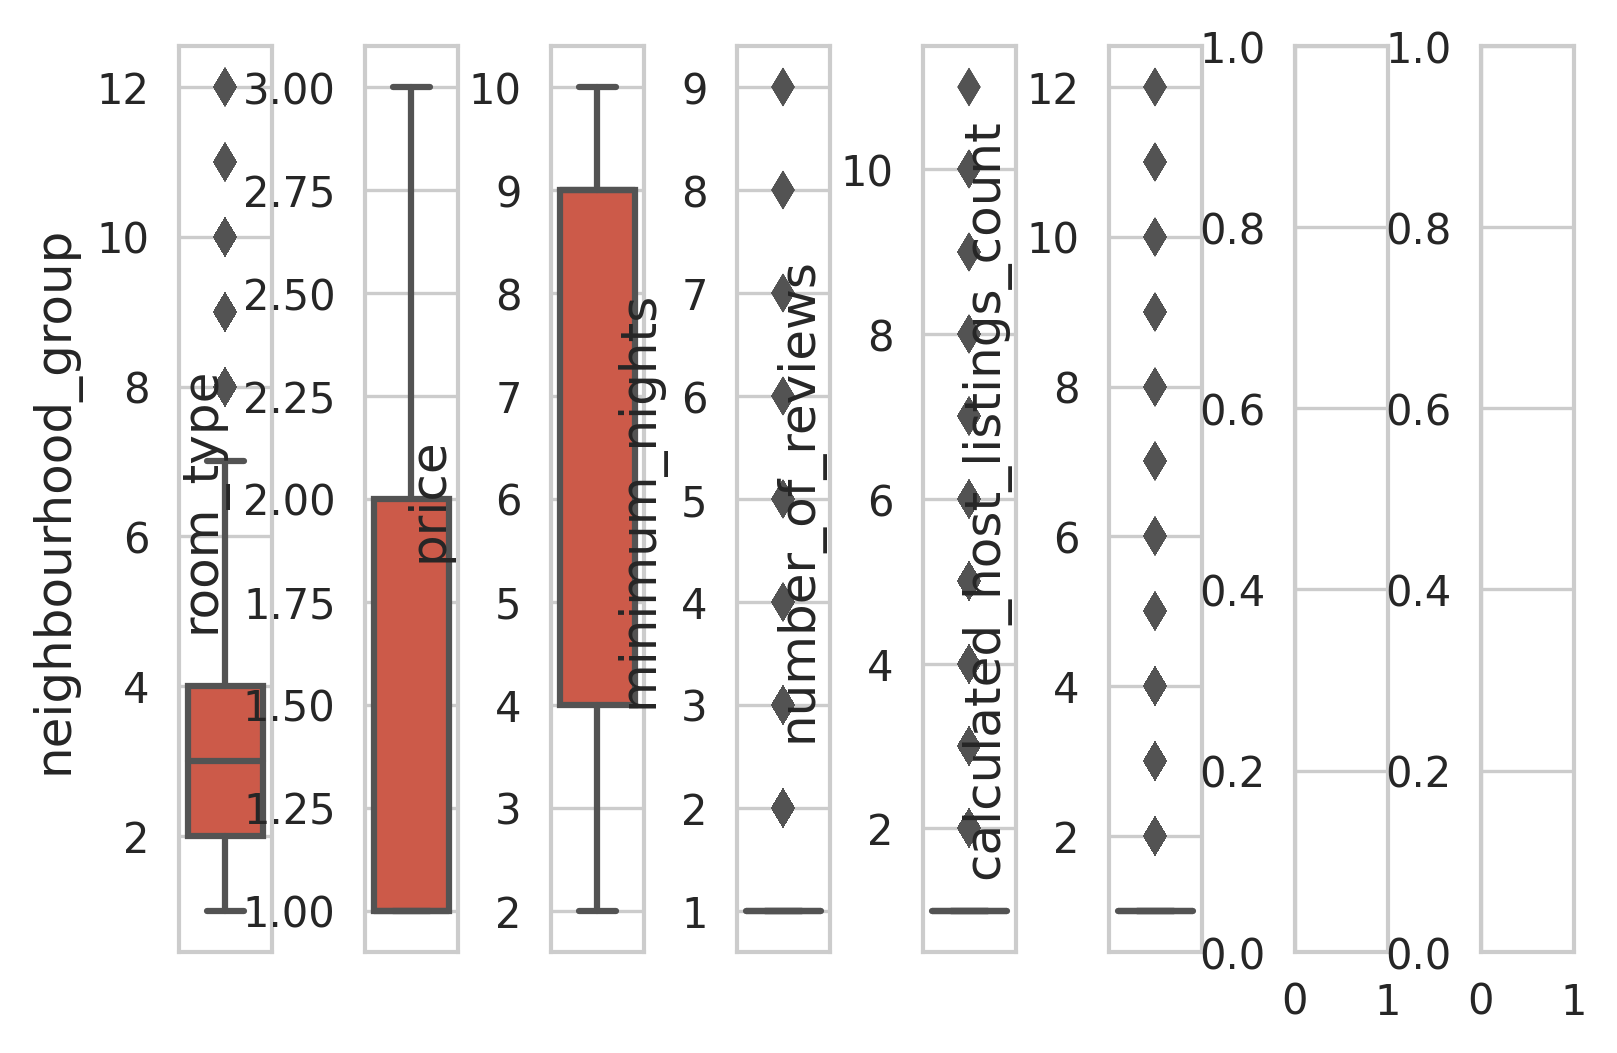

In [ ]:
#import library untuk kebutuhan modelling 
import seaborn as sns
#mendefinisikan style dengan Whitegrids
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl untuk modelling outlier
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#menentukan ukuran figure yaitu 50:100
plt.figure(figsize=(50, 100))
#membuat subplots sebanyak 8 bar
f, axes = plt.subplots(1, 8)
#memberikan nama label untuk setiap bar yang dimulai dari axes = 0 sampai axes = 7
sns.boxplot(y=df["neighbourhood_group"], ax=axes[0])
sns.boxplot(y=df["room_type"], ax=axes[1])
sns.boxplot(y=df["price"], ax=axes[2])
sns.boxplot(y=df["minimum_nights"], ax=axes[3])
sns.boxplot(y=df["number_of_reviews"], ax=axes[4])
sns.boxplot(y=df["calculated_host_listings_count"], ax=axes[5])
#menampilkan plot
plt.subplots_adjust(wspace=1)

In [ ]:
index=df[df['neighbourhood_group']>=7].index
df.drop(index , inplace=True)
index=df[df['price']>=500].index
df.drop(index , inplace=True)
index=df[df['minimum_nights']>=94].index
df.drop(index , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16824 entries, 0 to 22536
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood_group             16824 non-null  int64
 1   room_type                       16824 non-null  int64
 2   price                           16824 non-null  int64
 3   minimum_nights                  16824 non-null  int64
 4   number_of_reviews               16824 non-null  int64
 5   calculated_host_listings_count  16824 non-null  int64
dtypes: int64(6)
memory usage: 920.1 KB


## **Split Data**

In [ ]:
#melakukan split pada tabel paling belakang saja
X = df.iloc[:, :-3].values
#melakukan split pada tabel 1-5 belakang saja
Y = df.iloc[:, 4].values
#membagi X dan Y menjadi 2 bagian yaitu data test dan data train
#Perbandingan split yang digunakan adalah 2:3 (0.4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

##**Klasifikasi mengunakan Metode Naive Bayes**

In [ ]:
#melakukan dan menjalanan library Naive Bayes dari X_Train dan Y_Train
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

In [ ]:
#melakukan print Y_pred sebagai Y prediksi
print(Y_pred)
print('\n')
#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')
#melakukan print confusion matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
#melakukan print Classification report
print("Classification report")
print(classification_report(Y_test,Y_pred))

[1 1 1 ... 1 1 1]


Accuracy: 0.8149762282091918


[[4114    0    0    0    0    0    0    0    0    0    0]
 [ 448    0    0    0    0    0    0    0    0    0    0]
 [ 210    0    0    0    0    0    0    0    0    0    0]
 [ 106    0    0    0    0    0    0    0    0    0    0]
 [  74    0    0    0    0    0    0    0    0    0    0]
 [  37    0    0    0    0    0    0    0    0    0    0]
 [  29    0    0    0    0    0    0    0    0    0    0]
 [  16    0    0    0    0    0    0    0    0    0    0]
 [   7    0    0    0    0    0    0    0    0    0    0]
 [   6    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0]]


Classification report
              precision    recall  f1-score   support

           1       0.81      1.00      0.90      4114
           2       0.00      0.00      0.00       448
           3       0.00      0.00      0.00       210
           4       0.00      0.00      0.00       106
           5   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#menampilkan DataFrame yang membandingkan antara data actual dan data prediksi
x = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
x

,Actual,Predicted
0,1,1
1,3,1
2,1,1
3,1,1
4,1,1
...,...,...
5043,1,1
5044,1,1
5045,3,1
5046,1,1


In [ ]:
#merepresentasikan rata – rata kesalahan (error) absolut antara hasil prediksi dengan nilai sebenarnya
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 0.4106576862123613


# **KLASIFIKASI 2**
---
Klasifikasi merupakan teknik dalam data mining untuk mengelompokkan data berdasarkan keterikatan data terhadap  data sampel. Pada tugas besar ini, saya melakukan perbandingan 2 teknik klasifikasi untuk mengklasifikasi penjualan perumahan pada perusahaan airbnb. 

Pada klasifikasi 1 dan klasifikasi 2, saya menggunakan metode Naive Bayes. Perbedaannya terdapat pada tahapan Prepocessing Datanya. 

---
Untuk klasifikasi 2, saya melakukan tidak drop terhadap seluruh data yang terdapat missing valuenya. Namun missing value pada kolom reviews_per_month, dilakukan pengisian missing value dengan mencari nilai mean. Selanjutnya, dilakukan penghapusan beberapa outlier yang ada pada dataset setelah diberikan treatment handle outlier menggunakan nilai rata-rata (mean), namun tidak memberikan range pada setiap atribut. Sehingga, tetap menggunakan nilai asli dari kolom tersebut. Selanjutnya, nilai-nilai tersebut akan digunakan untuk perhitungan klasifikasi menggunakan metode Naive Bayes.

---



## **Import Library**

In [ ]:
#import library yang menunjang proses mining data
#Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. 
#Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif.
import pandas as pd
#NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 
#NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.
import numpy as np
import collections
#library untuk melakukan bilangan random integer
from random import randint
import random

#Skrip python untuk pembuatan klasifikasi menggunakan metode Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import library untuk split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

# Skrip python untuk pembuatan matriks
#library untuk menampilkan confusion_matrix
from sklearn.metrics import confusion_matrix
#library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score
#library untuk menampilkan classification_report
from sklearn.metrics import classification_report
#library untuk menampilkan f1 score
from sklearn.metrics import f1_score

#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics

#Import scikit-learn metrics module for accuracy calculation
#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics
from sklearn import preprocessing

#import library untuk membuat permodelan
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

##**Load Data**
Load Data adalah proses upload dan pembacaan data yang telah diupload.

In [ ]:
#membaca data csv yang sudah diupload dengan nama air_bnb
import io
df = pd.read_csv(io.BytesIO(dataupload['air_bnb.csv']))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


## **Prepocessing Data**

### **Cleaning Data**

In [ ]:
# Identifikasi missing value
df.isnull().head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#mengitung jumlah data missing
df.isnull().sum() 

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
#menghapus data yang missing
#mengisi missing value pada kolom reviews_per_month dengan nilai mean (rata-rata)
df = df.fillna({'reviews_per_month':df['reviews_per_month'].mean()})
#tabel yang memiliki missing value selain reviews_per_month, maka didrop
df.dropna(inplace=True)
#menampilkan info data
df.info() 
#menampilkan jumlah missing value pada setiap kolom setelah dilakukan cleaning data
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18593 entries, 0 to 22536
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18593 non-null  int64  
 1   name                            18593 non-null  object 
 2   host_id                         18593 non-null  int64  
 3   host_name                       18593 non-null  object 
 4   neighbourhood_group             18593 non-null  object 
 5   neighbourhood                   18593 non-null  object 
 6   latitude                        18593 non-null  float64
 7   longitude                       18593 non-null  float64
 8   room_type                       18593 non-null  object 
 9   price                           18593 non-null  int64  
 10  minimum_nights                  18593 non-null  int64  
 11  number_of_reviews               18593 non-null  int64  
 12  last_review                     

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#menampilkan data terbaru setela menghandle missing value
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,29772631,Cosy and lovely room near Ostkreuz,20727291,Anna,Lichtenberg,Neu Lichtenberg,52.502952,13.490870,Private room,25,2,1,2018-11-04,1.00,1,32
22463,29784461,House on the water HT10 - Heart of East Berlin,22437698,Sebastian,Treptow - Köpenick,Oberschöneweide,52.457982,13.526945,Entire home/apt,99,1,5,2018-11-06,5.00,2,339
22475,29792124,Welcome to Light Apartment,224133729,Inna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.507884,13.467071,Private room,25,1,1,2018-11-05,1.00,1,8
22508,29817383,Prenzlauerberg,224295751,Salem,Pankow,Prenzlauer Berg Nordwest,52.552250,13.410904,Entire home/apt,70,1,1,2018-11-07,1.00,1,350


In [ ]:
#menghapus tabel yg tidak digunakan
del df['id']
del df['name']
del df['host_id']
del df['host_name']
del df['latitude']
del df['longitude']
del df['last_review']
del df['availability_365']
del df['neighbourhood']
#mengeluarkan output df tanpa kolom yang sudah didrop
df

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,Mitte,Entire home/apt,60,4,118,3.76,4
1,Pankow,Private room,17,2,6,1.42,1
2,Pankow,Entire home/apt,90,62,143,1.25,1
3,Tempelhof - Schöneberg,Private room,26,5,25,0.39,1
4,Pankow,Private room,42,2,197,1.75,1
...,...,...,...,...,...,...,...
22449,Lichtenberg,Private room,25,2,1,1.00,1
22463,Treptow - Köpenick,Entire home/apt,99,1,5,5.00,2
22475,Friedrichshain-Kreuzberg,Private room,25,1,1,1.00,1
22508,Pankow,Entire home/apt,70,1,1,1.00,1


### **Replace value menjadi integer**

In [ ]:
#mengubah room type menjadi integer
#rekap data room_type
data1 = df['room_type']

# proses rekap 
rekapData1 = {}
for row in data1:
    if row in rekapData1:
        rekapData1[row] += 1
    else:
        rekapData1[row] = 1

#mengurutkan dari besar ke kecil
from operator import itemgetter
 
# sorting descending
sortedRekapData1 = sorted(rekapData1.items(), key=itemgetter(1), reverse=True)
 
#print(sortedRekapData3)
print(' ')
print('Banyaknya data pada Tabel room_type = ', len(sortedRekapData1))

df['room_type'] = df['room_type'].replace({'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3})

 
Banyaknya data pada Tabel room_type =  3


In [ ]:
#rekap data neighbourhood_group
data2 = df['neighbourhood_group']

# proses rekap 
rekapData2 = {}
for row in data2:
    if row in rekapData2:
        rekapData2[row] += 1
    else:
        rekapData2[row] = 1
#print(rekapData2)

#mengurutkan dari besar ke kecil
from operator import itemgetter
 
# sorting descending
sortedRekapData2 = sorted(rekapData2.items(), key=itemgetter(1), reverse=True)
 
print(sortedRekapData2)
print(' ')
print('Banyaknya data pada Tabel neighbourhood_group = ', len(sortedRekapData2))

df['neighbourhood_group'] =  df['neighbourhood_group'].replace({'Friedrichshain-Kreuzberg': 1, 'Mitte': 2, 'Pankow': 3, 'Neukölln': 4, 'Tempelhof - Schöneberg': 5, 'Charlottenburg-Wilm.': 6, 'Lichtenberg': 7, 'Treptow - Köpenick': 8, 'Steglitz - Zehlendorf': 9, 'Reinickendorf': 10, 'Marzahn - Hellersdorf': 11, 'Spandau': 12})

[('Friedrichshain-Kreuzberg', 4591), ('Mitte', 3823), ('Pankow', 2950), ('Neukölln', 2901), ('Tempelhof - Schöneberg', 1283), ('Charlottenburg-Wilm.', 1282), ('Lichtenberg', 529), ('Treptow - Köpenick', 477), ('Steglitz - Zehlendorf', 350), ('Reinickendorf', 199), ('Marzahn - Hellersdorf', 114), ('Spandau', 94)]
 
Banyaknya data pada Tabel neighbourhood_group =  12


In [ ]:
#mengubah kolom reviews_per_month dari float menjadi integer
df['reviews_per_month']=df['reviews_per_month'].astype(int)

In [ ]:
#menampilkan dataset dalam kondisi semua tabel dan value sudah berbentuk integer
df

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,2,2,60,4,118,3,4
1,3,1,17,2,6,1,1
2,3,2,90,62,143,1,1
3,5,1,26,5,25,0,1
4,3,1,42,2,197,1,1
...,...,...,...,...,...,...,...
22449,7,1,25,2,1,1,1
22463,8,2,99,1,5,5,2
22475,1,1,25,1,1,1,1
22508,3,2,70,1,1,1,1


### **Identifikasi Outlier**

<Figure size 15000x30000 with 0 Axes>

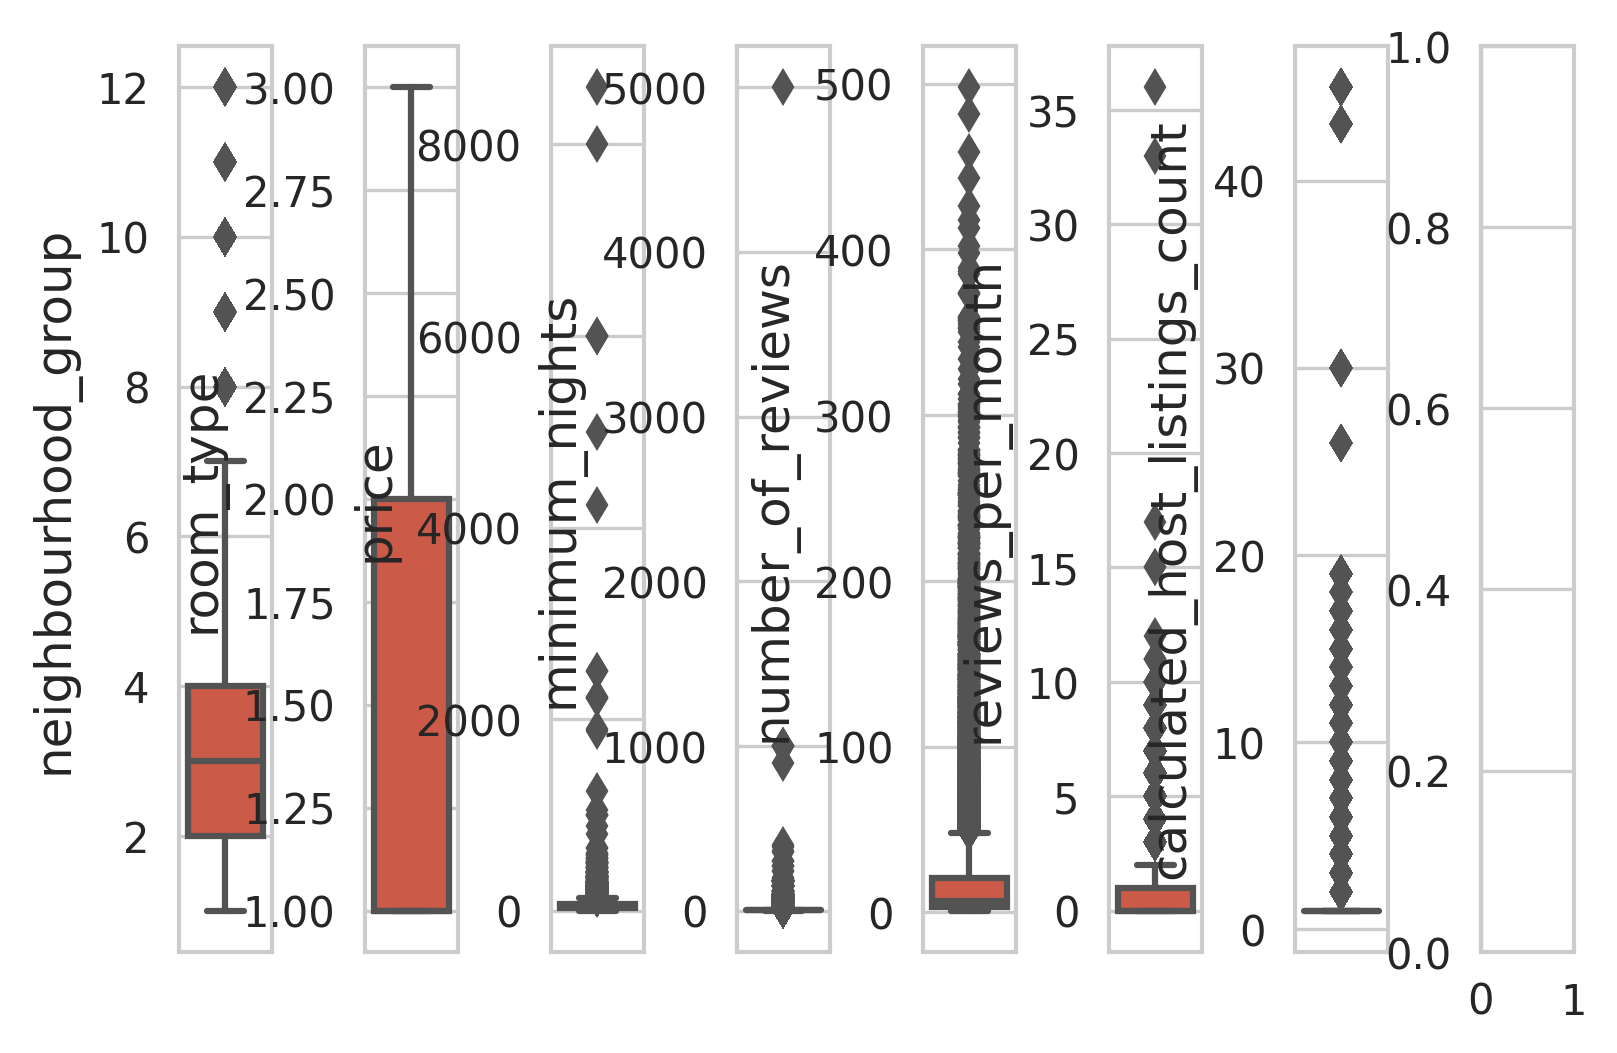

In [ ]:
#import library untuk kebutuhan modelling 
import seaborn as sns
#mendefinisikan style dengan Whitegrids
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl untuk modelling outlier
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#menentukan ukuran figure yaitu 50:100
plt.figure(figsize=(50, 100))
#membuat subplots sebanyak 8 bar
f, axes = plt.subplots(1, 8)
#memberikan nama label untuk setiap bar yang dimulai dari axes = 0 sampai axes = 7
sns.boxplot(y=df["neighbourhood_group"], ax=axes[0])
sns.boxplot(y=df["room_type"], ax=axes[1])
sns.boxplot(y=df["price"], ax=axes[2])
sns.boxplot(y=df["minimum_nights"], ax=axes[3])
sns.boxplot(y=df["number_of_reviews"], ax=axes[4])
sns.boxplot(y=df["reviews_per_month"], ax=axes[5])
sns.boxplot(y=df["calculated_host_listings_count"], ax=axes[6])
#sns.boxplot(y=df["Status"], ax=axes[7])
#menampilkan plot
plt.subplots_adjust(wspace=1)

In [ ]:
#identifikasi outlier pada atribut price
#array outlier untuk price
outlierprice = [] 
#array price
price = []
#inisialisasi i dan j dari 0
i = 0
j = 0
#melakukan perulangan sebanyak row pada kolom price
for row in df['price']:
  #dilakukan append terhadap array price
  price.append(int(row))
  #inisialisasi kondisi jika harga >= 500, batas ini dilihat dari batas outlier price pada plot diatas
  if (price[j] >= 500):
    #append nilai j kedalam array  outlierprice
    outlierprice.append(j)
  else:
    #jika tidak, maka j tidak akan bertambah
    j = j + 0
  #terjadinya looping pada perulangan j 
  j = j + 1

#mencari rata-rata pada data harga
#membuat variabel meanprice dengan rumus jumlah keseluruhan price/panjang row price
meanprice = sum(price)/len(price)
#inisialisasi i = 0
i = 0
#inisialisasi variabel dataprice dengan index pada outlier_price
dataprice = outlierprice[i]

#melakukan perulangan sebanya row pada price
for row in range(len(price)):
  #jika row yang ditunjuk oleh pointer termasuk bagian dari outlier price
  if (row == dataprice):
    #maka nilainya diganti menjadi rata-rata dalam price
    price[row] = meanprice
    i = i + 1
    #mengeluarkan informasi tentang jumlah outlier dari price
    if (i == len(outlierprice)):
      break
    dataprice = outlierprice[i]

#inisialisasi outlierprice
outlierprice = []
#melakukan perulangan sebanyak panjang row price 
for row in range(len(price)):
  #jika nilai row lebih besar sama dengan 500, maka diappend kedalam array outlierprice
  if price[row] >= 500:
    outlierprice.append(row)
#mengeluarkan nilai index dari outlier
print("index outlier : ",outlierprice)
#mengeluarkan data outlier
print("Banyak nya data price yang outlier :",len(outlierprice))
#mengeluarkan rata-rata price
print("Mean Price : ",meanprice)

index outlier :  []
Banyak nya data price yang outlier : 0
Mean Price :  61.98773732049696


In [ ]:
#identifikasi outlier pada atribut minimum_nights
#array outlier untuk minimum_nights
outlierminimum_nights = [] 
#array minimum_nights
minimum_nights = []
#inisialisasi i dan j dari 0
i = 0
j = 0
#melakukan perulangan sebanyak row pada kolom minimum_nights
for row in df['minimum_nights']:
  #dilakukan append terhadap array minimum_nights
  minimum_nights.append(int(row))
  #inisialisasi kondisi jika minimum_nights >= 500, batas ini dilihat dari batas outlier minimum_nights pada plot diatas
  if (minimum_nights[j] >= 5000):
    #append nilai j kedalam array  outlierminimum_nights
    outlierminimum_nights.append(j)
  else:
    #jika tidak, maka j tidak akan bertambah
    j = j + 0
  #terjadinya looping pada perulangan j 
  j = j + 1

#mencari rata-rata pada data minimum_nights
#membuat variabel meanminimum_nights dengan rumus jumlah keseluruhan minimum_nights/panjang row minimum_nights
meanminimum_nights = sum(minimum_nights)/len(minimum_nights)
#inisialisasi i = 0
i = 0
#inisialisasi variabel dataminimum_nights dengan index pada outlierminimum_nights
dataminimum_nights = outlierminimum_nights[i]

#melakukan perulangan sebanya row pada minimum_nights
for row in range(len(minimum_nights)):
  #jika row yang ditunjuk oleh pointer termasuk bagian dari outlier minimum_nights
  if (row == dataminimum_nights):
    #maka nilainya diganti menjadi rata-rata dalam minimum_nights
    minimum_nights[row] = meanminimum_nights
    i = i + 1
    #mengeluarkan informasi tentang jumlah outlier dari minimum_nights
    if (i == len(outlierminimum_nights)):
      break
    dataminimum_nights = outlierminimum_nights[i]

#inisialisasi outlierminimum_nights
outlierminimum_nights = []
#melakukan perulangan sebanyak panjang row minimum_nights 
for row in range(len(minimum_nights)):
  #jika nilai row lebih besar sama dengan 5000, maka diappend kedalam array outlierminimum_nights
  if minimum_nights[row] >= 5000:
    outlierminimum_nights.append(row)
#mengeluarkan nilai index dari outlier minimum_nights
print("index outlier : ",outlierminimum_nights)
#mengeluarkan data outlier
print("Banyak nya data minimum_nights yang outlier :",len(outlierminimum_nights))
#mengeluarkan rata-rata minimum_nights
print("Mean minimum_nights : ",meanminimum_nights)

index outlier :  []
Banyak nya data minimum_nights yang outlier : 0
Mean minimum_nights :  6.535040068843113


In [ ]:
#melakukan drop terhadap nilai yang masih masuk dalam range outlier
index = df[df['minimum_nights'] >= 94].index
df.drop(index , inplace = True)

In [ ]:
#identifikasi outlier pada atribut number_of_reviews
#array outlier untuk number_of_reviews
outliernumber_of_reviews = [] 
#array number_of_reviews
number_of_reviews = []
#inisialisasi i dan j dari 0
i = 0
j = 0
#melakukan perulangan sebanyak row pada kolom number_of_reviews
for row in df['number_of_reviews']:
  #dilakukan append terhadap array number_of_reviews
  number_of_reviews.append(int(row))
  #inisialisasi kondisi jika number_of_reviews >= 90, batas ini dilihat dari batas outlier number_of_reviews pada plot diatas
  if (number_of_reviews[j] >= 90):
    #append nilai j kedalam array  outliernumber_of_reviews
    outliernumber_of_reviews.append(j)
  else:
    #jika tidak, maka j tidak akan bertambah
    j = j + 0
  #terjadinya looping pada perulangan j 
  j = j + 1

#mencari rata-rata pada data number_of_reviews
#membuat variabel meannumber_of_reviews dengan rumus jumlah keseluruhan number_of_reviews/panjang row number_of_reviews
meannumber_of_reviews = sum(number_of_reviews)/len(number_of_reviews)
#inisialisasi i = 0
i = 0
#inisialisasi variabel datanumber_of_reviews dengan index pada outliernumber_of_reviews
datanumber_of_reviews = outliernumber_of_reviews[i]

#melakukan perulangan sebanya row pada number_of_reviews
for row in range(len(number_of_reviews)):
  #jika row yang ditunjuk oleh pointer termasuk bagian dari outlier number_of_reviews
  if (row == datanumber_of_reviews):
    #maka nilainya diganti menjadi rata-rata dalam number_of_reviews
    number_of_reviews[row] = meannumber_of_reviews
    i = i + 1
    #mengeluarkan informasi tentang jumlah outlier dari number_of_reviews
    if (i == len(outliernumber_of_reviews)):
      break
    datanumber_of_reviews = outliernumber_of_reviews[i]

#inisialisasi outliernumber_of_reviews
outliernumber_of_reviews = []
#melakukan perulangan sebanyak panjang row number_of_reviews 
for row in range(len(number_of_reviews)):
  #jika nilai row lebih besar sama dengan 90, maka diappend kedalam array outliernumber_of_reviews
  if number_of_reviews[row] >= 90:
    outliernumber_of_reviews.append(row)
#mengeluarkan nilai index dari outlier number_of_reviews
print("index outlier : ",outliernumber_of_reviews)
#mengeluarkan data outlier
print("Banyak nya data number_of_reviews yang outlier :",len(outliernumber_of_reviews))
#mengeluarkan rata-rata number_of_reviews
print("Mean number_of_reviews : ", meannumber_of_reviews)

index outlier :  []
Banyak nya data number_of_reviews yang outlier : 0
Mean number_of_reviews :  21.642486766771093


In [ ]:
#melakukan drop terhadap nilai yang masih masuk dalam range outlier
index = df[df['number_of_reviews'] >= 90].index
df.drop(index , inplace = True)

In [ ]:
df

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
1,3,1,17,2,6,1,1
3,5,1,26,5,25,0,1
5,3,2,180,6,6,0,1
6,3,2,70,90,23,0,3
8,1,2,90,60,48,0,2
...,...,...,...,...,...,...,...
22449,7,1,25,2,1,1,1
22463,8,2,99,1,5,5,2
22475,1,1,25,1,1,1,1
22508,3,2,70,1,1,1,1


In [ ]:
outlierreviews_per_month = [] #array outlier untuk reviews_per_month
reviews_per_month = []
i = 0
j = 0
for row in df['reviews_per_month']:
  reviews_per_month.append(int(row))
  if (reviews_per_month[j] >= 15):
    outlierreviews_per_month.append(j)
  else:
    j = j + 0
  j = j + 1
mean_reviews_per_month = sum(reviews_per_month)/len(reviews_per_month)
i = 0
temp = outlierreviews_per_month[i]
  
for row in range(len(reviews_per_month)):
    
  if (row == temp):
    # print(row)
    reviews_per_month[row] = mean_reviews_per_month
    i = i + 1
    if (i == len(outlierreviews_per_month)):
      break

outlierreviews_per_month = []
for row in range(len(reviews_per_month)):
  if reviews_per_month[row] >= 15:
    outlierreviews_per_month.append(row)
print("index outlier : ", outlierreviews_per_month)
print("Banyak nya data number_of_reviews yang outlier :",len(outlierreviews_per_month))
print("Mean Price : ",mean_reviews_per_month)

index outlier :  [16008, 16010, 16015]
Banyak nya data number_of_reviews yang outlier : 3
Mean Price :  0.6442164392984066


In [ ]:
#melakukan drop terhadap nilai outlier yang masih ada
index = df[df['reviews_per_month'] >= 7].index
df.drop(index , inplace = True)

In [ ]:
df

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
1,3,1,17,2,6,1,1
3,5,1,26,5,25,0,1
5,3,2,180,6,6,0,1
6,3,2,70,90,23,0,3
8,1,2,90,60,48,0,2
...,...,...,...,...,...,...,...
22449,7,1,25,2,1,1,1
22463,8,2,99,1,5,5,2
22475,1,1,25,1,1,1,1
22508,3,2,70,1,1,1,1


<Figure size 15000x30000 with 0 Axes>

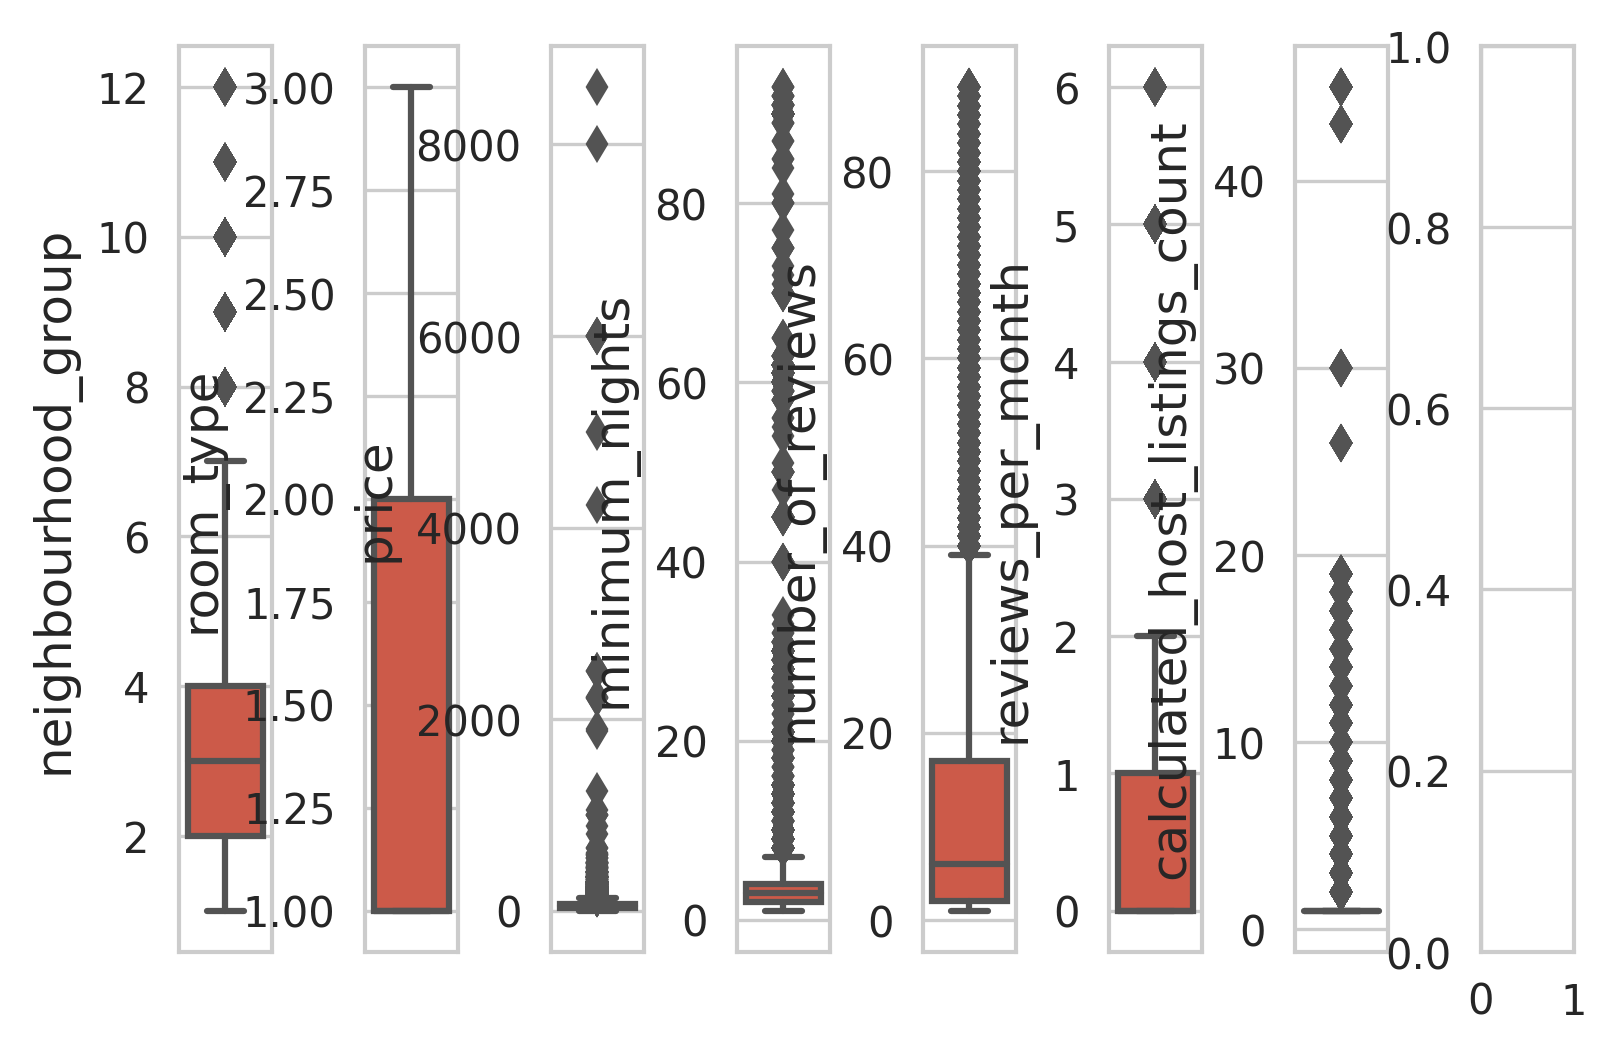

In [ ]:
#import library untuk kebutuhan modelling 
import seaborn as sns
#mendefinisikan style dengan Whitegrids
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl untuk modelling outlier
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#menentukan ukuran figure yaitu 50:100
plt.figure(figsize=(50, 100))
#membuat subplots sebanyak 8 bar
f, axes = plt.subplots(1, 8)
#memberikan nama label untuk setiap bar yang dimulai dari axes = 0 sampai axes = 7
sns.boxplot(y=df["neighbourhood_group"], ax=axes[0])
sns.boxplot(y=df["room_type"], ax=axes[1])
sns.boxplot(y=df["price"], ax=axes[2])
sns.boxplot(y=df["minimum_nights"], ax=axes[3])
sns.boxplot(y=df["number_of_reviews"], ax=axes[4])
sns.boxplot(y=df["reviews_per_month"], ax=axes[5])
sns.boxplot(y=df["calculated_host_listings_count"], ax=axes[6])
#sns.boxplot(y=df["Status"], ax=axes[7])
#menampilkan plot
plt.subplots_adjust(wspace=1)

## **Split Data**

In [ ]:
#melakukan split pada tabel paling belakang saja
X = df.iloc[:, :-1].values
#melakukan split pada tabel 1-6 belakang saja
Y = df.iloc[:, 6].values
#membagi X dan Y menjadi 2 bagian yaitu data test dan data train
#Perbandingan split yang digunakan adalah 2:3 (0.4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

## **Klasifikasi Naive Bayes**

In [ ]:
#melakukan dan menjalanan library Naive Bayes dari X_Train dan Y_Train
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

In [ ]:
#melakukan print Y_pred sebagai Y prediksi
print(Y_pred)
print('\n')
#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')
#melakukan print confusion matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
#melakukan print Classification report
print("Classification report")
print(classification_report(Y_test,Y_pred))

[17 45  1 ...  1  1 12]


Accuracy: 0.5143241684291482


[[2610   44    0    0    5    4    1    0    2    6   11  165    7    4
    38   15  596  144    5   23  121   75  188]
 [ 422   10    0    0    1    0    0    0    3    1    0   28    1    1
    12    5   80   26    0    1   17   19   17]
 [ 109    3    0    0    0    1    0    0    2    0    1    6    0    0
     9    1   27    9    0    1   12    2    7]
 [  42    0    0    0    0    1    0    0    0    1    0    3    0    0
     4    1    5    4    0    0    0    3    3]
 [  12    0    0    0    0    0    0    0    0    0    0    4    0    0
     2    0   10    2    0    0    0    2    1]
 [   8    0    0    0    0    0    0    0    1    0    0    2    0    0
     6    1    5    2    0    0    0    0    2]
 [  11    1    0    0    0    0    0    0    0    0    0    4    0    0
     4    0    4    3    0    0    3    0    1]
 [   6    0    0    0    0    0    0    0    0    0    0    0    0    0
     1    1    2    0    0    0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#menampilkan DataFrame yang membandingkan antara data actual dan data prediksi
x = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
x

,Actual,Predicted
0,1,17
1,1,45
2,1,1
3,1,1
4,1,17
...,...,...
5196,1,1
5197,1,17
5198,1,1
5199,1,1


In [ ]:
#merepresentasikan rata – rata kesalahan (error) absolut antara hasil prediksi dengan nilai sebenarnya
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 7.587002499519323


# **KESIMPULAN**

Dari Klasifikasi 1 dan Kalsifikasi 2 didapatkan hasil akurasi yang berbeda. 

---
Klasifikasi 1 menghasilkan akurasi sebesar 81,49% dengan menggunakan metode Naive Bayes dan preprocessing sebagai berikut :
1.   Melakukan drop untuk semua kolom yang mempunyai missig value
2.   Membuat range-range tertentu untuk setiap kolom, dengan batas range adalah 15. Tujuannya agar data tidak menyebar terlalu banyak dan bisa terkolompok dalam beberapa bagian.
3. Melakukan replace untuk setiap range pada kolom dan menggantinya dengan bilangan integer.
4. Melakukan penghapusan beberapa outlier dengan cara langsung didrop.

Klasifikasi 2 menghasilkan akurasi sebesar 51,43% dengan menggunakan metode Naive Bayes dan preprocessing sebagai berikut :
1. Melakukan drop untuk semua tabel, kecuali tabel reviews_per_month yang dihandle menggunakan pencarian rata-rata nilai kolom tersebut. Sehingga untuk row yang bernilai NaN atau kosong, akan diganti dengan nilai mean dari kolom reviews_per_month.
2. Tidak melakukan range untuk semua kolom, hanya mengubah kolom room_type dan neighborhood menjadi bilangan integer.
3. Mengganti tipe data kolom reviews_per_month dari float menjadi integer
4. Mencari outlier dan memberikan treatment dengan mencari rata-rata dari nilai kolom tersebut. Kemudian, dilakukan plot ulang dan didrop beberapa outlier yang masih ada walaupun sudah diganti menggunakan mean.

Menurut saya, untuk seluruh atribut yang sama dan proses split data yang sama namun menghasilkan akurasi yang berbeda ini terjadi karena pada klasifikasi 2, data menyebar terlalu banyak dan tidak berada dalam 1 range yang sama. Sehingga, menyebabkan menurunan pada akurasinya. 

Evaluasi untuk kedepannya adalah melakukan pembuatan range data secara terstruktur menggunakan library scalling dan menghandle outlier lebih baik lagi agar mendapatkan hasil akurasi yang maksimal.
